In [162]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import os

In [188]:
def load_all_images(path):
    images = []
    names = []
    for image in glob.glob(path+"/*.jpg"):
        img = cv2.imread(image, 0)
        images.append(img)
        
        only_name = os.path.splitext(image)[0].split('\\')[1]
        names.append(only_name)
    return images,names

In [164]:
def image2BGR(image):
    h = image.shape[0]
    h = int(h / 3)
    b = image[:h]
    g = image[h:2*h]
    r = image[2*h:3*h]
    return(b, g, r)

In [196]:
def crop_image(image, crop_rate = 0.05):
    x1 = int(image.shape[0] * crop_rate)
    x2 = int(image.shape[0] - image.shape[0] * crop_rate)
    y1 = int(image.shape[1] * crop_rate)
    y2 = int(image.shape[1] - image.shape[1] * crop_rate)
    
    return image[x1:x2, y1:y2]

In [166]:
def score(image1, image2):
    return np.sum(np.sum((image1-image2)**2))

In [167]:
def sobel_edge_detection(image, axis = 'y'):
    if(axis == 'y'):
        return cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    elif(axis == 'x'):
        return cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    else:
        return 0

In [168]:
def align_images(image1, image2, sobel = True, align_point = [15, 15]):
    min_score = float('inf')
    point = []
    
    pointX_list = np.arange(-align_point[0], align_point[0])
    pointY_list = np.arange(-align_point[1], align_point[1])
    
    if(sobel == True):
        image1 = sobel_edge_detection(image1)
        image2 = sobel_edge_detection(image2)
    
    for x in pointX_list:
        for y in pointY_list:
            shifted_image2 = np.roll(image2, [x, y], axis=(0,1))
            new_score = score(image1, shifted_image2)
            if(new_score <= min_score):
                min_score = new_score
                point = [x, y]
    return point

In [189]:
def align_and_colorize(image, image_name):
    b, g, r = image2BGR(image)
    b = crop_image(b)
    g = crop_image(g)
    r = crop_image(r)
    
    br = align_images(b, r)
    bg = align_images(b, g)
    
    print(f"\n----- Displacement Vectors for {image_name} -----")
    print(f"Red - Blue = {br}")
    print(f"Green - Blue = {bg}")
    
    new_g = np.roll(g, bg, axis = (0,1))
    new_r = np.roll(r, br, axis = (0,1))
    
    rgb = np.dstack([new_r, new_g, b])
    
    return rgb

In [190]:
def save_image(image, path):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(path, image)


----- Displacement Vectors for 00029u -----
Red - Blue = [12, 5]
Green - Blue = [5, 3]

----- Displacement Vectors for 00087u -----
Red - Blue = [13, 7]
Green - Blue = [6, 5]

----- Displacement Vectors for 00088v -----
Red - Blue = [4, 5]
Green - Blue = [3, 3]

----- Displacement Vectors for 00106v -----
Red - Blue = [9, -1]
Green - Blue = [4, 1]

----- Displacement Vectors for 00128u -----
Red - Blue = [6, 5]
Green - Blue = [4, 3]

----- Displacement Vectors for 00137v -----
Red - Blue = [11, 9]
Green - Blue = [6, 6]

----- Displacement Vectors for 00163v -----
Red - Blue = [-4, 1]
Green - Blue = [-3, 1]

----- Displacement Vectors for 00351v -----
Red - Blue = [13, 1]
Green - Blue = [4, 0]

----- Displacement Vectors for 00737u -----
Red - Blue = [6, 2]
Green - Blue = [2, 1]

----- Displacement Vectors for 00757v (1) -----
Red - Blue = [5, 5]
Green - Blue = [2, 3]

----- Displacement Vectors for 00757v -----
Red - Blue = [5, 5]
Green - Blue = [2, 3]

----- Displacement Vectors for 

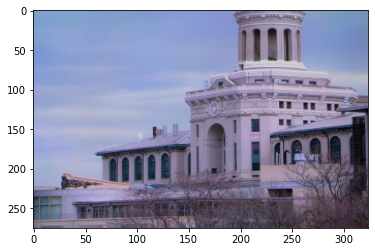

In [197]:
images, names = load_all_images("original_images")

for image, name in zip(images, names):
    colorized_image = align_and_colorize(image, name)
    colorized_image = crop_image(colorized_image)
    save_image(colorized_image, f"colorized/colorized_{name}.jpg")
    plt.imshow(colorized_image, aspect = 'auto')